In [1]:
import config
from dataloader.loader import Loader
import pandas as pd
from gensim.models import word2vec
import nltk


Using TensorFlow backend.
C:\Users\tghosh\AppData\Local\Continuum\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#unsupervised = Loader.load_imdb_unsup()
unsupervised = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_unsup.csv', encoding='ISO-8859-1')

In [3]:
unsupervised.head()



,Unnamed: 0,review
0,41353,"If you listen closely, you can catch sublimina..."
1,21919,Tweety is perched in his cage on the ledge and...
2,46492,"I love action movies. Die Hard, Lethal Wepon, ..."
3,2478,"I know that title isn't very descriptive, but ..."
4,37290,"Sadly, this film is a laugh-less failure (minu..."


In [4]:
train_df = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv(config.IMDB_DATA_CSV + '/movie_reviews_test.csv', encoding='ISO-8859-1')

In [12]:
corpus = unsupervised['review'].tolist() + train_df['review'].tolist() + test_df['review'].tolist()

In [18]:
# tokenize sentences in corpus
wpt = nltk.WordPunctTokenizer()
tokenized_corpus = [wpt.tokenize(document.lower()) for document in corpus]

In [20]:
# Set values for various parameters
feature_size = 50    # Word vector dimensionality  
window_context = 10          # Context window size                                                                                    
min_word_count = 5   # Minimum word count                        
sample = 1e-3   # Downsample setting for frequent words

In [21]:
w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                          window=window_context, min_count=min_word_count,
                          sample=sample, iter=1000)


In [40]:
similar_words = {search_term: [item[0] for item in w2v_model.wv.most_similar([search_term], topn=5)]
                  for search_term in ['good','superior','violent', 'romantic', 'nasty', 'unfortunate', 
                                      'predictable', 'hilarious', 'fascinating', 'boring','confused', 'sensitive',
                                     'imaginative','senseless', 'bland','disappointing']}


In [41]:
similar_words

{'bland': ['dull', 'lifeless', 'forgettable', 'uninspired', 'unconvincing'],
 'boring': ['dull', 'pointless', 'tedious', 'predictable', 'uninteresting'],
 'confused': ['irritated', 'puzzled', 'disturbed', 'frustrated', 'annoyed'],
 'disappointing': ['unsatisfying',
  'disappointed',
  'enjoyable',
  'surprising',
  'satisfying'],
 'fascinating': ['compelling',
  'enthralling',
  'captivating',
  'unique',
  'vivid'],
 'good': ['decent', 'great', 'nice', 'bad', 'fine'],
 'hilarious': ['funny', 'hysterical', 'priceless', 'comical', 'humorous'],
 'imaginative': ['inventive',
  'innovative',
  'ingenious',
  'intricate',
  'creative'],
 'nasty': ['sadistic', 'sleazy', 'gory', 'icky', 'vicious'],
 'predictable': ['clichéd', 'formulaic', 'contrived', 'implausible', 'dull'],
 'romantic': ['romance',
  'screwball',
  'bittersweet',
  'sentimental',
  'delightful'],
 'senseless': ['pointless',
  'meaningless',
  'disgusting',
  'sickening',
  'boring'],
 'sensitive': ['sincere', 'passionate', '

In [8]:
#w2v_model.wv.save_word2vec_format(fname = 'imdb_word2vec.txt')
file = 'C:/Users/tghosh/Work/Data Science/Transfer Learning/Chapter-7/Data/word2vec/imdb_word2vec.txt'
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format(file, binary=False)

In [12]:
similar_words = {search_term: [item[0] for item in word_vectors.wv.most_similar([search_term], topn=5)]
                  for search_term in ['good','superior','violent', 'romantic', 'nasty', 'unfortunate', 
                                      'predictable', 'hilarious', 'fascinating', 'boring','confused', 'sensitive',
                                     'imaginative','senseless', 'bland','disappointing']}
pd.DataFrame(similar_words).transpose()

,0,1,2,3,4
bland,dull,lifeless,forgettable,uninspired,unconvincing
boring,dull,pointless,tedious,predictable,uninteresting
confused,irritated,puzzled,disturbed,frustrated,annoyed
disappointing,unsatisfying,disappointed,enjoyable,surprising,satisfying
fascinating,compelling,enthralling,captivating,unique,vivid
good,decent,great,nice,bad,fine
hilarious,funny,hysterical,priceless,comical,humorous
imaginative,inventive,innovative,ingenious,intricate,creative
nasty,sadistic,sleazy,gory,icky,vicious
predictable,clichéd,formulaic,contrived,implausible,dull


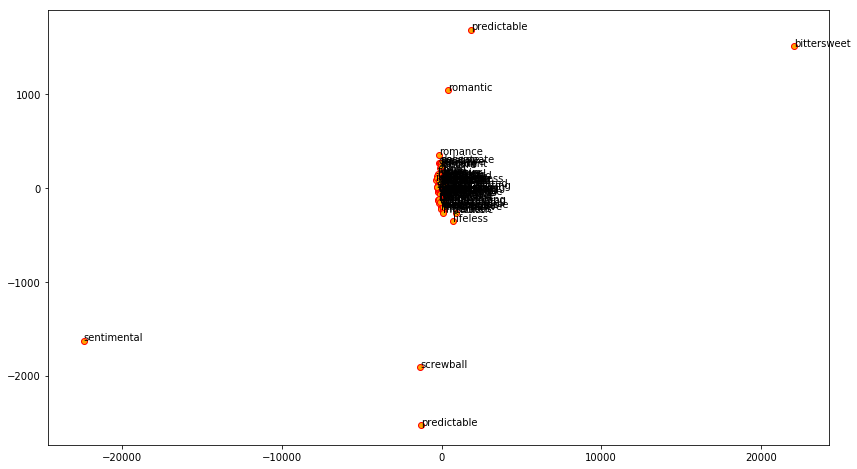

In [45]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_colwidth = 200
%matplotlib inline
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(14, 8))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')